In [1]:
import torch

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/jovyan/.conda/envs/bioblp-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.font_manager

In [3]:
# matplotlib.font_manager.findSystemFonts()

In [4]:
#
# Constants
sns.set(font="Helvetica Neue")
# sns.set_context("paper")
sns.set_style("ticks")

sns.set_palette("tab10")

In [5]:
reports_path = Path("/home/jovyan/BioBLP/data/reports/")

In [6]:
# metadata_path = "../data/benchmarks/experiments/dpi_fda/1681301749/models/mcs39etm-1681392769-scores.pt"

In [7]:
# data = torch.load(metadata_path)

In [8]:
# data[0]

Box plots from wandb export

In [9]:
# dpi_r10_results = Path("../data/benchmarks/experiments/DPI/wandb-export-dpi-r10-best.csv")
dpi_r10_results = Path("../data/benchmarks/experiments/DPI/wandb-dpi-r10-results-final.csv")
dpi_r10_results_grouped = Path("../data/benchmarks/experiments/DPI/wandb-dpi-r10-results-final-grouped.csv")

In [10]:
r10_results_df = pd.read_csv(dpi_r10_results, sep=",")

In [11]:
r10_results_df.head()

,Name,test_AUCPR,test_AUCROC,test_f1,test_precision,test_recall,model_feature,model_clf,State,Notes,...,train_loss,train_precision,train_recall,trial_number,valid_AUCPR,valid_AUCROC,valid_f1,valid_loss,valid_precision,valid_recall
0,dutiful-grass-844,0.364849,0.853328,0.750456,0.241125,0.812851,transe,MLP,finished,-,...,0.442834,0.246400,0.824399,NaN,0.340947,0.840831,0.743506,0.494904,0.2291,0.770415
1,major-firebrand-2554,0.383264,0.866430,0.903388,0.467769,0.454497,transe,RF,finished,-,...,NaN,0.693366,0.971557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hardy-lake-4796,0.172362,0.713040,0.631412,0.156945,0.698608,transe,LR,finished,-,...,NaN,0.157897,0.697095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,expert-bee-2586,0.385375,0.881195,0.907522,0.488330,0.364123,transe,RF,finished,-,...,NaN,0.756855,0.984474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,glorious-eon-4811,0.168011,0.675768,0.655383,0.154275,0.622591,transe,LR,finished,-,...,NaN,0.156150,0.623210,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
r10_results_df["model_feature"].unique()

array(['transe', 'structural', 'rotate', 'noise', 'complex', 'bioblpp',
       'bioblpm', 'bioblpd'], dtype=object)

In [86]:
feat_labels = ["BioBLP-D", "BioBLP-M", "BioBLP-P", "ComplEx", "Noise", "RotatE", "Structural", "TransE"]
feat_dict = {x.lower().replace("-", ""): x for x in feat_labels}
feat_dict["noise"] = "Random"


def order_df(df):
    ordered_dfs = [
        df[df["model_feature"].isin(["Random", "Structural"])],
        df[df["model_feature"].isin(["ComplEx", "RotatE", "TransE"])],
        df[df["model_feature"].isin(["BioBLP-D", "BioBLP-M", "BioBLP-P"])],
    ]
    ordered_dfs = pd.concat(ordered_dfs)
    return ordered_dfs

def format_results_df(df):
    df["model_feature"] = df["model_feature"].apply(lambda x: feat_dict.get(x, x)) 
    
    df = df.sort_values(by=["model_feature", "model_clf"])
    
    ordered_dfs = order_df(df)
    
    
    
    
    return ordered_dfs
    

In [87]:

r10_results_df = format_results_df(r10_results_df)

# r10_results_df["model_feature"] = r10_results_df["model_feature"].apply(lambda x: feat_dict.get(x, x))
r10_results_df.head()

,Name,test_AUCPR,test_AUCROC,test_f1,test_precision,test_recall,model_feature,model_clf,State,Notes,...,train_loss,train_precision,train_recall,trial_number,valid_AUCPR,valid_AUCROC,valid_f1,valid_loss,valid_precision,valid_recall
49,playful-pyramid-4698,0.132852,0.596760,0.609121,0.121344,0.528640,Random,LR,finished,-,...,NaN,0.122561,0.538616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,different-river-4725,0.127167,0.595495,0.597051,0.118438,0.532655,Random,LR,finished,-,...,NaN,0.123738,0.556217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,likely-feather-4690,0.129050,0.597959,0.608698,0.121071,0.527979,Random,LR,finished,-,...,NaN,0.122345,0.534163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,fresh-vortex-4722,0.128565,0.597220,0.606191,0.121326,0.533869,Random,LR,finished,-,...,NaN,0.122995,0.541792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,dainty-oath-4704,0.126322,0.597679,0.586538,0.117864,0.547109,Random,LR,finished,-,...,NaN,0.123045,0.566457,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# rf_results = r10_results_df[r10_results_df["model_clf"] == "RF"].sort_values(by=["model_feature"])



In [16]:
if False:
    plt.figure(figsize=(12,6))
    g = sns.boxplot(data=r10_results_df, x="model_feature", y="test_AUCPR", hue="model_clf")
    g.set(xlabel="Embedding")
    g.set(ylabel="AUCPR (\u2191)")
    g.set(title=u"AUCPR scores DPI ratio 1:10")

    plt.grid(axis="both")
    plt.legend(title='Classifier')
    plt.show()

In [17]:
if False:
    plt.figure(figsize=(12,6))
    g = sns.boxplot(data=r10_results_df, x="model_feature", y="test_AUCROC", hue="model_clf")
    g.set(xlabel="Embedding")
    g.set(ylabel="AUCROC (\u2191)")
    g.set(title=u"AUCROC scores DPI ratio 1:10")

    plt.grid(axis="both")
    plt.legend(title='Classifier')
    plt.show()

In [18]:
def plot_aucpr_aucroc(df, savefile = None, title=""):
    fig, axs = plt.subplots(2, 1, figsize=(12,9))
    
    box_width = 0.5
    
    multiple_clfs = df["model_clf"].nunique() > 1

    sns.boxplot(data=df, x="model_feature", y="test_AUCPR", hue="model_clf" if multiple_clfs else None,
                ax=axs[0], width=box_width).set(ylabel="AUPRC (\u2191)", xlabel="")
    # plt.grid()

    sns.boxplot(data=df, x="model_feature", y="test_AUCROC", hue="model_clf" if multiple_clfs else None,
                ax=axs[1], width=box_width).set(ylabel="AUROC (\u2191)", xlabel="")
    
    if multiple_clfs:
        axs[0].legend(title='Classifier')
        axs[1].legend(title='Classifier')

    axs[0].grid(axis="both")
    axs[1].grid(axis="both")

    plt.suptitle(title)
    plt.tight_layout()
    
    if savefile is not None:
        plt.savefig(savefile, dpi=300, format="pdf")

    plt.show()

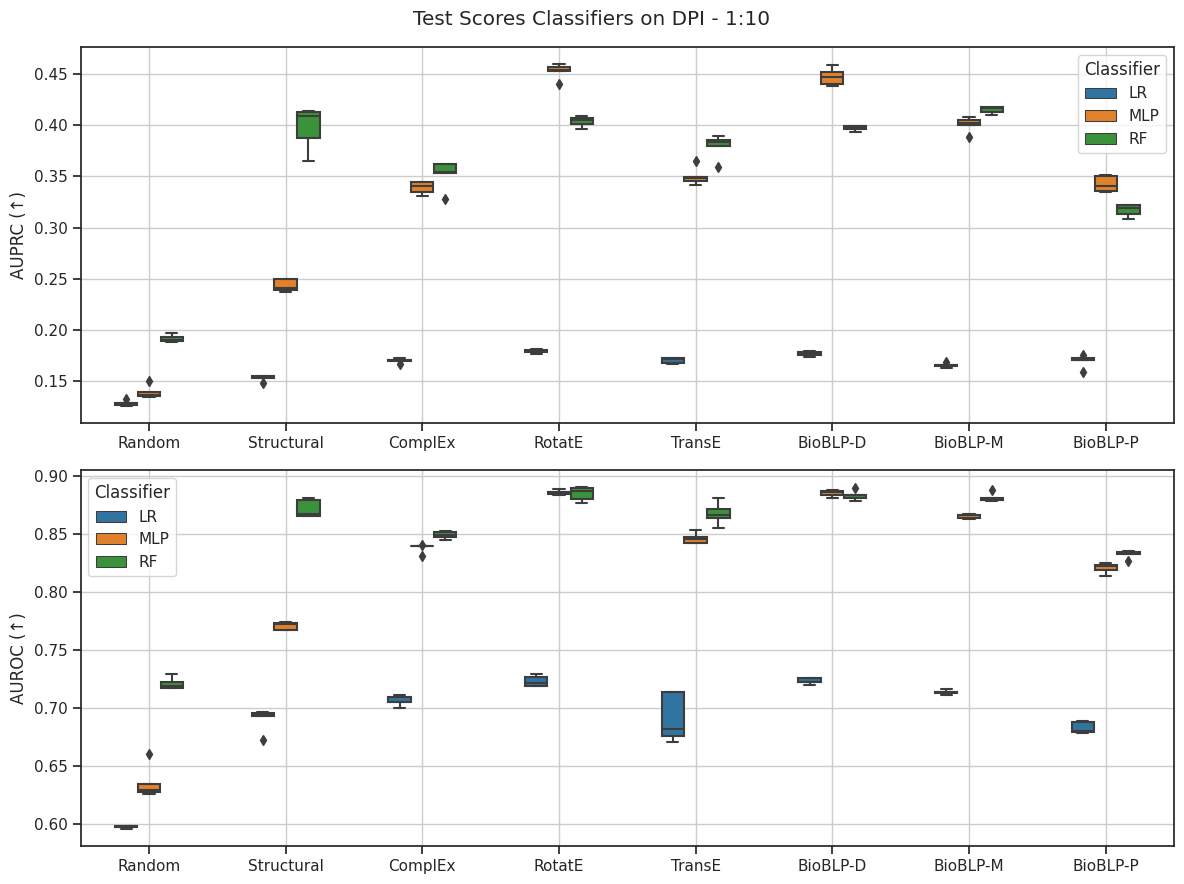

In [19]:
plot_aucpr_aucroc(r10_results_df, savefile=reports_path.joinpath("20230426-dpi-r10-all-aucs-box.pdf"), 
                  title="Test Scores Classifiers on DPI - 1:10")


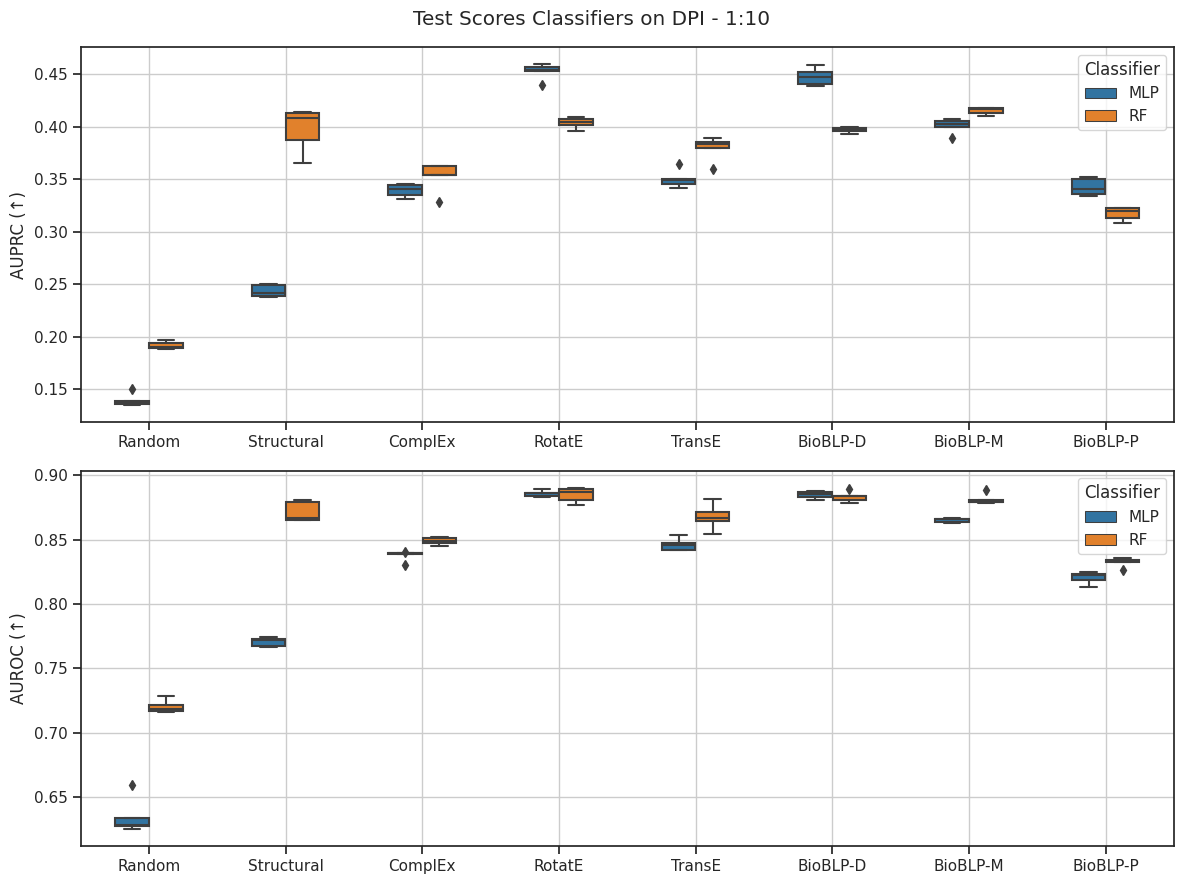

In [20]:
best_models_df = r10_results_df[r10_results_df["model_clf"].isin(["RF", "MLP"])]

plot_aucpr_aucroc(best_models_df, savefile=reports_path.joinpath("20230426-dpi-r10-rf-mlp-aucs-box.pdf"),
                     title="Test Scores Classifiers on DPI - 1:10")

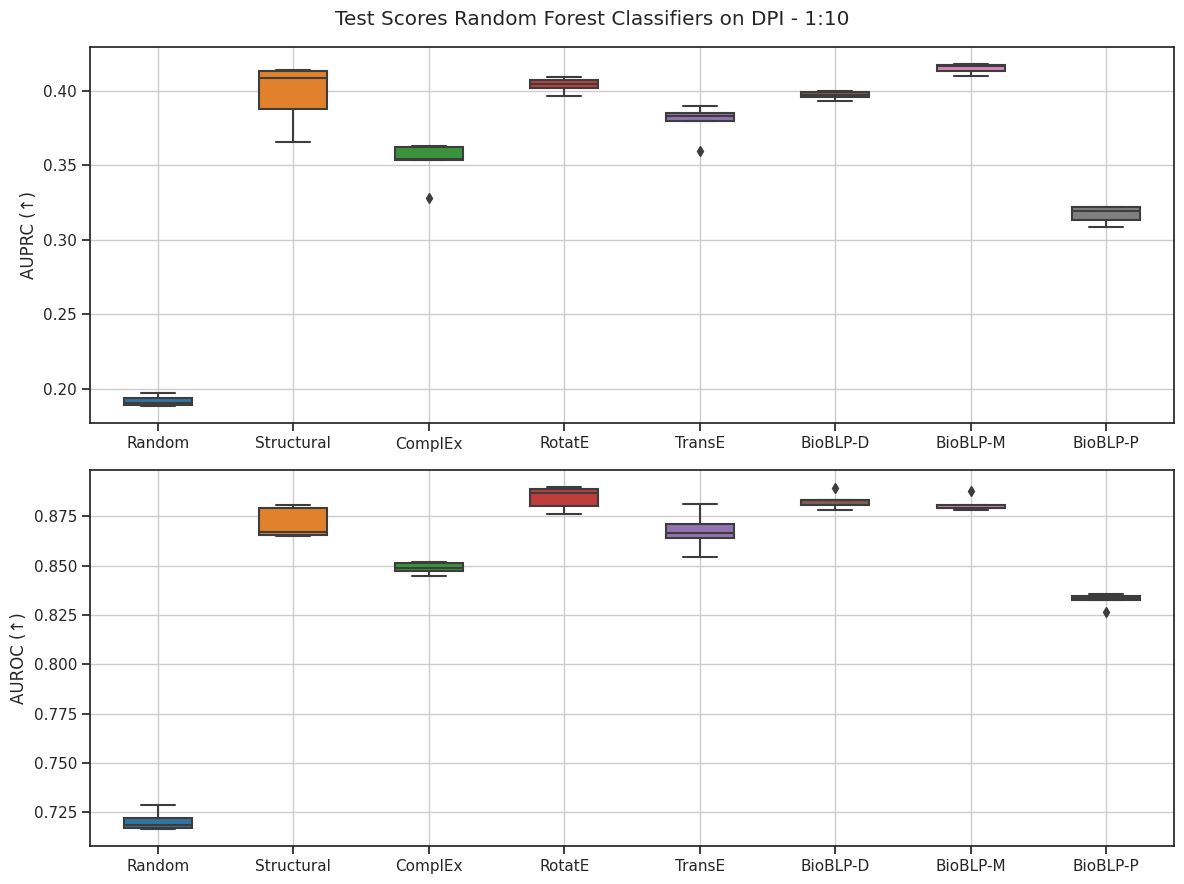

In [21]:
r1_rf_models_df = r10_results_df[r10_results_df["model_clf"].isin(["RF"])]

plot_aucpr_aucroc(r1_rf_models_df, savefile=reports_path.joinpath("20230426-dpi-r10-rf-aucs-box.pdf"),
                     title="Test Scores Random Forest Classifiers on DPI - 1:10")

In [22]:
rf_results = r10_results_df[r10_results_df["model_clf"] == "RF"]

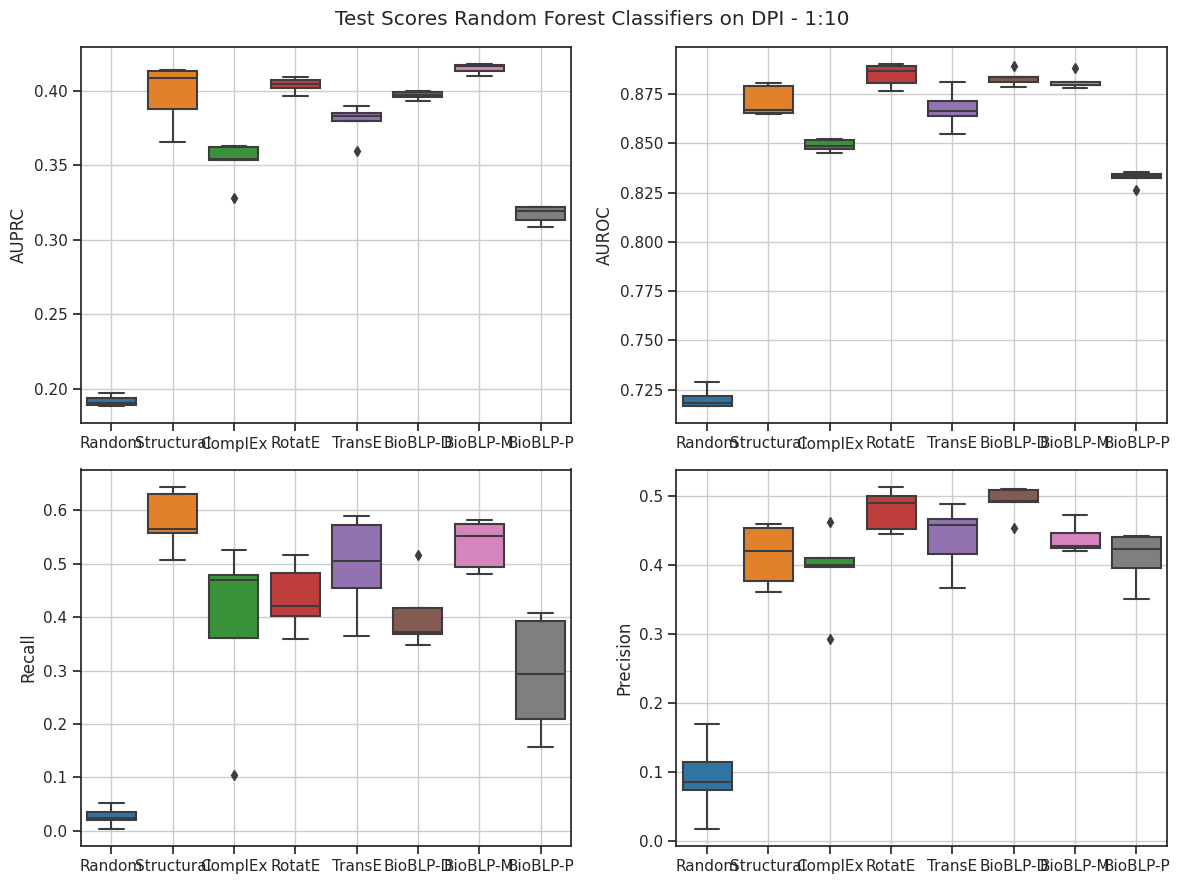

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))


g = sns.boxplot(data=rf_results, x="model_feature", y="test_AUCPR", 
            ax=axs[0, 0]).set(ylabel="AUPRC", xlabel="", xticks=range(len(feat_labels)))

sns.boxplot(data=rf_results, x="model_feature", y="test_AUCROC", 
            ax=axs[0, 1]).set(ylabel="AUROC", xlabel="")
sns.boxplot(data=rf_results, x="model_feature", y="test_recall", 
            ax=axs[1, 0]).set(ylabel="Recall", xlabel="")
sns.boxplot(data=rf_results, x="model_feature", y="test_precision", 
            ax=axs[1, 1]).set(ylabel="Precision", xlabel="")
# sns.despine()

plt.suptitle("Test Scores Random Forest Classifiers on DPI - 1:10")
axs[0][0].grid(axis="both")
axs[0][1].grid(axis="both")
axs[1][0].grid(axis="both")
axs[1][1].grid(axis="both")

plt.tight_layout()
plt.show()

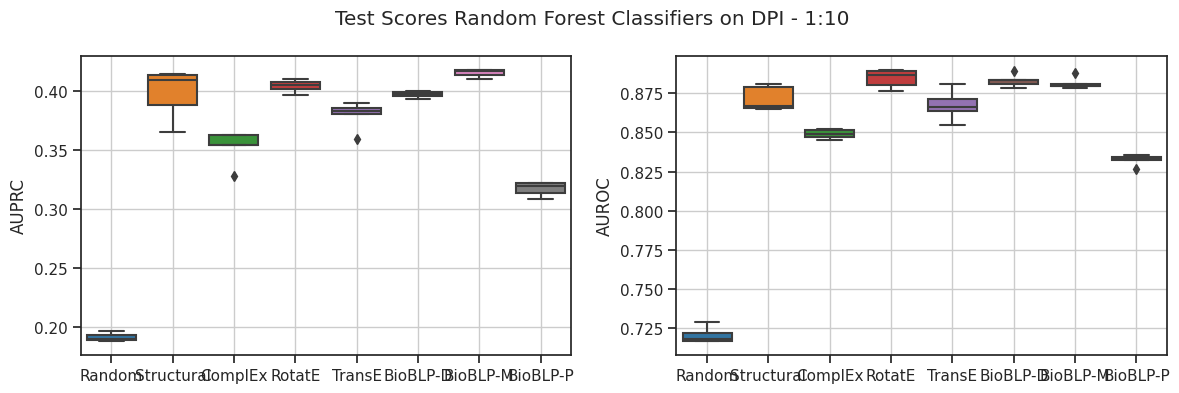

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=rf_results, x="model_feature", y="test_AUCPR", 
            ax=axs[0]).set(ylabel="AUPRC", xlabel="")
sns.boxplot(data=rf_results, x="model_feature", y="test_AUCROC", 
            ax=axs[1]).set(ylabel="AUROC", xlabel="")
axs[0].grid(axis="both")
axs[1].grid(axis="both")

# sns.despine()
plt.suptitle("Test Scores Random Forest Classifiers on DPI - 1:10")
plt.tight_layout()

plt.show()

## Scatter

r10_results_df = pd.read_csv(dpi_r10_results, sep=",")

In [25]:
r10_results_grouped_df = pd.read_csv(dpi_r10_results_grouped, sep=",")
r10_results_grouped_df = format_results_df(r10_results_grouped_df)
r10_results_grouped_df.head()

,Name,test_AUCPR,test_AUCROC,test_f1,test_precision,test_recall,model_feature,model_clf,State,Notes,...,train_loss,train_precision,train_recall,trial_number,valid_AUCPR,valid_AUCROC,valid_f1,valid_loss,valid_precision,valid_recall
12,"""noise__LR""",0.128791,0.597023,0.601520,0.120009,0.534050,Random,LR,finished,-,...,NaN,0.122937,0.547449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,"""noise__MLP""",0.139388,0.635156,0.593640,0.130211,0.610932,Random,MLP,finished,-,...,0.630846,0.141088,0.661822,NaN,0.143017,0.636341,0.591775,0.671120,0.129738,0.611513
14,"""noise__RF""",0.191691,0.720468,0.888951,0.092575,0.026877,Random,RF,finished,-,...,NaN,0.812441,0.997055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,"""structural__LR""",0.153273,0.690180,0.617221,0.150103,0.688190,Structural,LR,finished,-,...,NaN,0.155870,0.714263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,"""structural__MLP""",0.243520,0.770605,0.665187,0.180928,0.760253,Structural,MLP,finished,-,...,0.559821,0.183801,0.773571,NaN,0.242194,0.772384,0.662773,0.586042,0.179897,0.760910


In [131]:
def scatter_aucpr_auroc(df, savefile = None, title=""):
    df_ = df.copy()
    
    plt.figure(figsize=(12,9))
    
    df_["Embedding"] = df_["model_feature"]
    df_["Classifier"] = df_["model_clf"]
    
    sns.scatterplot(data=df_, x="test_AUCROC", y="test_AUCPR", hue="Embedding", style="Classifier", s=100).set(ylabel="AUPRC", xlabel="AUROC")
    plt.grid()
    # plt.legend(markerscale=1)
    
    plt.suptitle(title)
    plt.tight_layout()
    
    if savefile is not None:
        plt.savefig(savefile, dpi=300, format="pdf")

    plt.show()
    
    

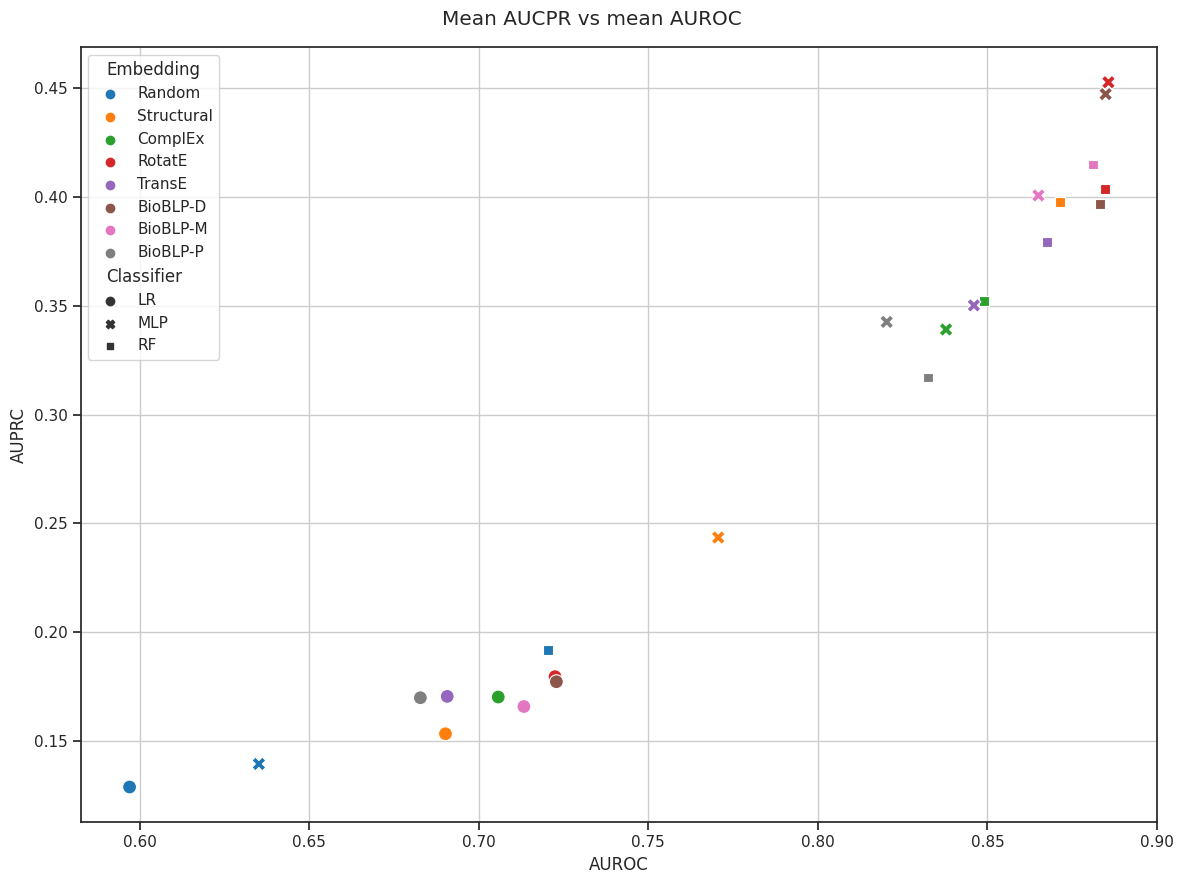

In [132]:
scatter_aucpr_auroc(r10_results_grouped_df, title="Mean AUCPR vs mean AUROC", savefile=reports_path.joinpath("20230426-dpi-r10-aucs-scatter-all.pdf"),)

## Table

In [35]:
r10_results_df

,Name,test_AUCPR,test_AUCROC,test_f1,test_precision,test_recall,model_feature,model_clf,State,Notes,...,train_loss,train_precision,train_recall,trial_number,valid_AUCPR,valid_AUCROC,valid_f1,valid_loss,valid_precision,valid_recall
49,playful-pyramid-4698,0.132852,0.596760,0.609121,0.121344,0.528640,Random,LR,finished,-,...,NaN,0.122561,0.538616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,different-river-4725,0.127167,0.595495,0.597051,0.118438,0.532655,Random,LR,finished,-,...,NaN,0.123738,0.556217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,likely-feather-4690,0.129050,0.597959,0.608698,0.121071,0.527979,Random,LR,finished,-,...,NaN,0.122345,0.534163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,fresh-vortex-4722,0.128565,0.597220,0.606191,0.121326,0.533869,Random,LR,finished,-,...,NaN,0.122995,0.541792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,dainty-oath-4704,0.126322,0.597679,0.586538,0.117864,0.547109,Random,LR,finished,-,...,NaN,0.123045,0.566457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,different-grass-3120,0.313283,0.833443,0.897009,0.351642,0.157697,BioBLP-P,RF,finished,-,...,NaN,0.810705,0.999398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,dazzling-darkness-3131,0.322199,0.834393,0.899686,0.441664,0.392236,BioBLP-P,RF,finished,-,...,NaN,0.695824,0.943318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,dark-elevator-3109,0.322137,0.835438,0.902122,0.442339,0.293630,BioBLP-P,RF,finished,-,...,NaN,0.767038,0.995784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,tough-sea-3088,0.308480,0.826495,0.899129,0.396246,0.209047,BioBLP-P,RF,finished,-,...,NaN,0.802603,0.994579,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
def results_table(df):
    df_ = df[["model_feature", "model_clf", "test_AUCPR", "test_AUCROC", "test_f1"]]
    
    df_ = df_.groupby(by=["model_feature", "model_clf"]).agg(AUPRC_mean=("test_AUCPR", "mean"), \
                                                             AUPRC_std=("test_AUCPR", "std"), \
                                                             AUROC_mean=("test_AUCROC", "mean"), \
                                                             AUROC_std=("test_AUCROC", "std"), \
                                                             F1_mean=("test_f1", "mean"), \
                                                             F1_std=("test_f1", "std"))
    
    cols = df_.columns
    
    for col in cols:
        # df_[col] = round(df_[col], 3)
        df_[col] = df_[col].apply(lambda x: '{:.3f}'.format(round(x, 3)))
    
    print(cols)
    metrics_out = ["AUPRC", "AUROC", "F1"]
    for metric in metrics_out:
        df_[metric] = df_[metric + "_mean"].astype(str) + " ( ± " + df_[metric + "_std"].astype(str) + " )"
    # df_ = df_.reset_index()
    # df_ = order_df(df_)
    
    ordered_records = ["Random", "Structural", "ComplEx", "RotatE", "TransE", "BioBLP-D", "BioBLP-M", "BioBLP-P"]
    
    
    # out_cols = ["Embedding", "Classifier"] + metrics_out
    
    return df_[metrics_out].loc[ordered_records]

In [121]:
results_table(r10_results_df)

Index(['AUPRC_mean', 'AUPRC_std', 'AUROC_mean', 'AUROC_std', 'F1_mean',
       'F1_std'],
      dtype='object')


AUPRC              AUROC  \
model_feature model_clf                                         
Random        LR         0.129 ( ± 0.003 )  0.597 ( ± 0.001 )   
              MLP        0.139 ( ± 0.006 )  0.635 ( ± 0.014 )   
              RF         0.192 ( ± 0.004 )  0.720 ( ± 0.005 )   
Structural    LR         0.153 ( ± 0.003 )  0.690 ( ± 0.010 )   
              MLP        0.244 ( ± 0.006 )  0.771 ( ± 0.003 )   
              RF         0.398 ( ± 0.021 )  0.871 ( ± 0.008 )   
ComplEx       LR         0.170 ( ± 0.002 )  0.706 ( ± 0.004 )   
              MLP        0.339 ( ± 0.006 )  0.838 ( ± 0.004 )   
              RF         0.352 ( ± 0.014 )  0.849 ( ± 0.003 )   
RotatE        LR         0.180 ( ± 0.002 )  0.722 ( ± 0.005 )   
              MLP        0.453 ( ± 0.008 )  0.886 ( ± 0.002 )   
              RF         0.404 ( ± 0.005 )  0.885 ( ± 0.006 )   
TransE        LR         0.170 ( ± 0.003 )  0.691 ( ± 0.021 )   
              MLP        0.350 ( ± 0.009 )  0.846 ( ± 0.005 )   
              RF         0.380 ( ± 0.012 )  0.868 ( ± 0.010 )   
BioBLP-D      LR         0.177 ( ± 0.003 )  0.723 ( ± 0.003 )   
              MLP        0.447 ( ± 0.008 )  0.885 ( ± 0.003 )   
              RF         0.397 ( ± 0.003 )  0.883 ( ± 0.004 )   
BioBLP-M      LR         0.166 ( ± 0.002 )  0.713 ( ± 0.002 )   
              MLP        0.401 ( ± 0.007 )  0.865 ( ± 0.002 )   
              RF         0.415 ( ± 0.003 )  0.881 ( ± 0.004 )   
BioBLP-P      LR         0.170 ( ± 0.006 )  0.683 ( ± 0.005 )   
              MLP        0.343 ( ± 0.008 )  0.820 ( ± 0.005 )   
              RF         0.317 ( ± 0.006 )  0.832 ( ± 0.004 )   

                                        F1  
model_feature model_clf                     
Random        LR         0.602 ( ± 0.010 )  
              MLP        0.594 ( ± 0.004 )  
              RF         0.889 ( ± 0.001 )  
Structural    LR         0.617 ( ± 0.010 )  
              MLP        0.665 ( ± 0.010 )  
              RF         0.885 ( ± 0.016 )  
ComplEx       LR         0.639 ( ± 0.004 )  
              MLP        0.755 ( ± 0.003 )  
              RF         0.892 ( ± 0.008 )  
RotatE        LR         0.643 ( ± 0.003 )  
              MLP        0.794 ( ± 0.006 )  
              RF         0.905 ( ± 0.006 )  
TransE        LR         0.650 ( ± 0.017 )  
              MLP        0.750 ( ± 0.003 )  
              RF         0.894 ( ± 0.015 )  
BioBLP-D      LR         0.641 ( ± 0.002 )  
              MLP        0.792 ( ± 0.002 )  
              RF         0.907 ( ± 0.004 )  
BioBLP-M      LR         0.634 ( ± 0.003 )  
              MLP        0.764 ( ± 0.002 )  
              RF         0.895 ( ± 0.006 )  
BioBLP-P      LR         0.636 ( ± 0.005 )  
              MLP        0.744 ( ± 0.015 )  
              RF         0.899 ( ± 0.002 )

In [123]:
print(results_table(r10_results_df).to_latex(index=True, ))

Index(['AUPRC_mean', 'AUPRC_std', 'AUROC_mean', 'AUROC_std', 'F1_mean',
       'F1_std'],
      dtype='object')
\begin{tabular}{lllll}
\toprule
         &    &              AUPRC &              AUROC &                 F1 \\
model\_feature & model\_clf &                    &                    &                    \\
\midrule
Random & LR &  0.129 ( ± 0.003 ) &  0.597 ( ± 0.001 ) &  0.602 ( ± 0.010 ) \\
         & MLP &  0.139 ( ± 0.006 ) &  0.635 ( ± 0.014 ) &  0.594 ( ± 0.004 ) \\
         & RF &  0.192 ( ± 0.004 ) &  0.720 ( ± 0.005 ) &  0.889 ( ± 0.001 ) \\
Structural & LR &  0.153 ( ± 0.003 ) &  0.690 ( ± 0.010 ) &  0.617 ( ± 0.010 ) \\
         & MLP &  0.244 ( ± 0.006 ) &  0.771 ( ± 0.003 ) &  0.665 ( ± 0.010 ) \\
         & RF &  0.398 ( ± 0.021 ) &  0.871 ( ± 0.008 ) &  0.885 ( ± 0.016 ) \\
ComplEx & LR &  0.170 ( ± 0.002 ) &  0.706 ( ± 0.004 ) &  0.639 ( ± 0.004 ) \\
         & MLP &  0.339 ( ± 0.006 ) &  0.838 ( ± 0.004 ) &  0.755 ( ± 0.003 ) \\
         & RF &  0.352 ( ± 0.01

/tmp/ipykernel_318/1419034195.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_table(r10_results_df).to_latex(index=True))


### r 1:1

In [134]:
# dpi_r1_results = Path("../data/benchmarks/experiments/DPI/wandb-export-dpi-r1-best.csv")
dpi_r1_results = Path("../data/benchmarks/experiments/DPI/wandb-dpi-r1-results-final.csv")
dpi_r1_results_grouped = Path("../data/benchmarks/experiments/DPI/wandb-dpi-r1-results-final-grouped.csv")

In [135]:
r1_results_df = pd.read_csv(dpi_r1_results, sep=",")

r1_results_df = format_results_df(r1_results_df)


r1_results_df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,C,bootstrap,...,train_loss,train_precision,train_recall,trial_number,valid_AUCPR,valid_AUCROC,valid_f1,valid_loss,valid_precision,valid_recall
55,twilight-paper-3173,finished,-,tpijnenburg,"1682087488, 7x7s8k17, 7x7s8k17-noise__LR-3, be...",2023-04-24T22:01:27.000Z,11,NaN,0.000112,NaN,...,NaN,0.587087,0.545205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,woven-sun-3163,finished,-,tpijnenburg,"1682087488, 7x7s8k17, 7x7s8k17-noise__LR-2, be...",2023-04-24T22:00:28.000Z,14,NaN,0.000649,NaN,...,NaN,0.586946,0.575358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,avid-blaze-3174,finished,-,tpijnenburg,"1682087488, 7x7s8k17, 7x7s8k17-noise__LR-1, be...",2023-04-24T22:01:38.000Z,51,NaN,0.000016,NaN,...,NaN,0.588209,0.519475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,olive-universe-3202,finished,-,tpijnenburg,"1682087488, 7x7s8k17, 7x7s8k17-noise__LR-4, be...",2023-04-24T22:04:29.000Z,14,NaN,0.000099,NaN,...,NaN,0.588073,0.542461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,genial-deluge-3182,finished,-,tpijnenburg,"1682087488, 7x7s8k17, 7x7s8k17-noise__LR-0, be...",2023-04-24T22:02:59.000Z,12,NaN,0.000203,NaN,...,NaN,0.584070,0.557020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:


r1_rf_results = r1_results_df[r1_results_df["model_clf"] == "RF"]



In [31]:
# fig, axs = plt.subplots(1, 2, figsize=(12,4))

# sns.boxplot(data=r1_rf_results, x="model_feature", y="test_AUCPR", 
#             ax=axs[0]).set(ylabel="AUPRC", xlabel="")
# sns.boxplot(data=r1_rf_results, x="model_feature", y="test_AUCROC", 
#             ax=axs[1]).set(ylabel="AUROC", xlabel="")
# axs[0].grid(axis="both")
# axs[1].grid(axis="both")
# # sns.despine()
# plt.suptitle("Test Scores Random Forest Classifiers on DPI - 1:1")
# plt.tight_layout()

# plt.show()

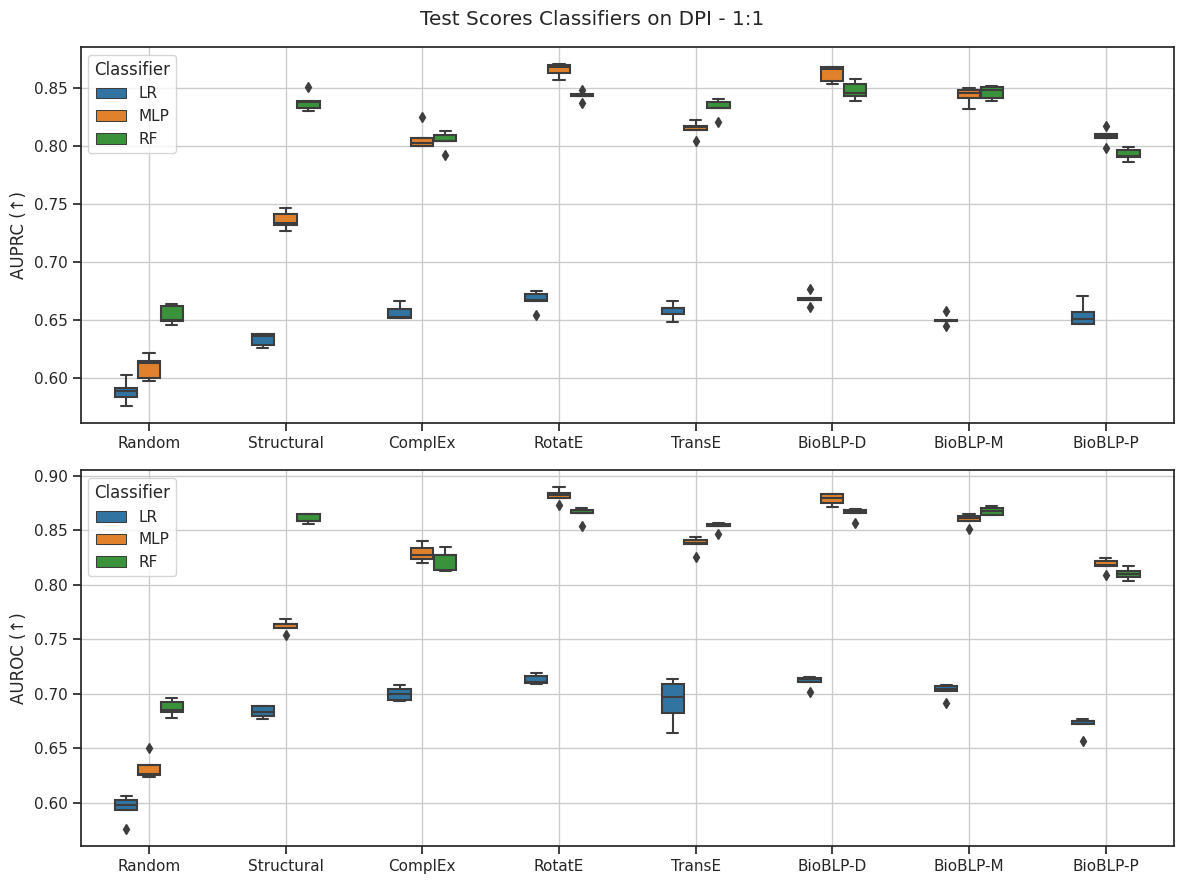

In [32]:
plot_aucpr_aucroc(r1_results_df, savefile=reports_path.joinpath("20230426-dpi-r1-all-aucs-box.pdf"),
                 title="Test Scores Classifiers on DPI - 1:1")


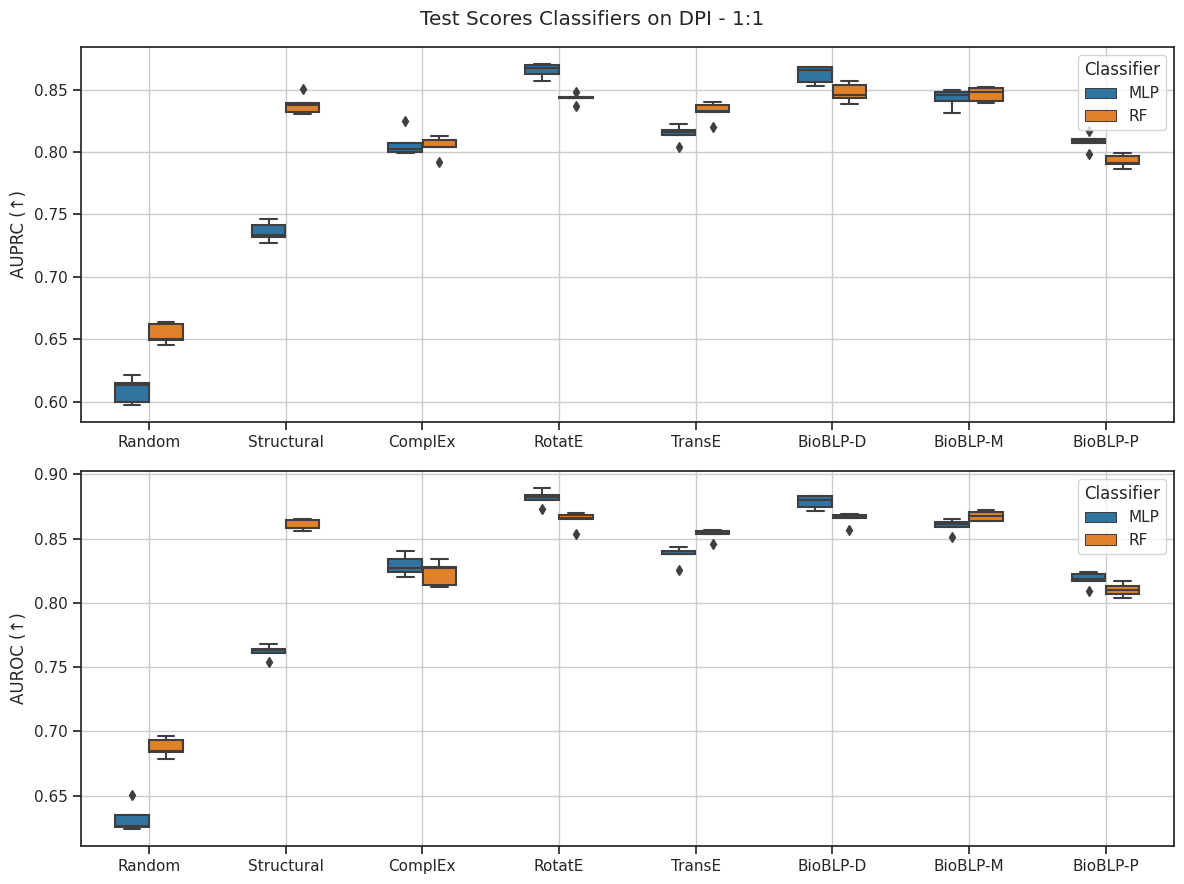

In [33]:
r1_results_df_rf_mlp = r1_results_df[r1_results_df["model_clf"].isin(["RF", "MLP"])]

plot_aucpr_aucroc(r1_results_df_rf_mlp, savefile=reports_path.joinpath("20230426-dpi-r1-rf-mlp-aucs-box.pdf"),
                 title="Test Scores Classifiers on DPI - 1:1")


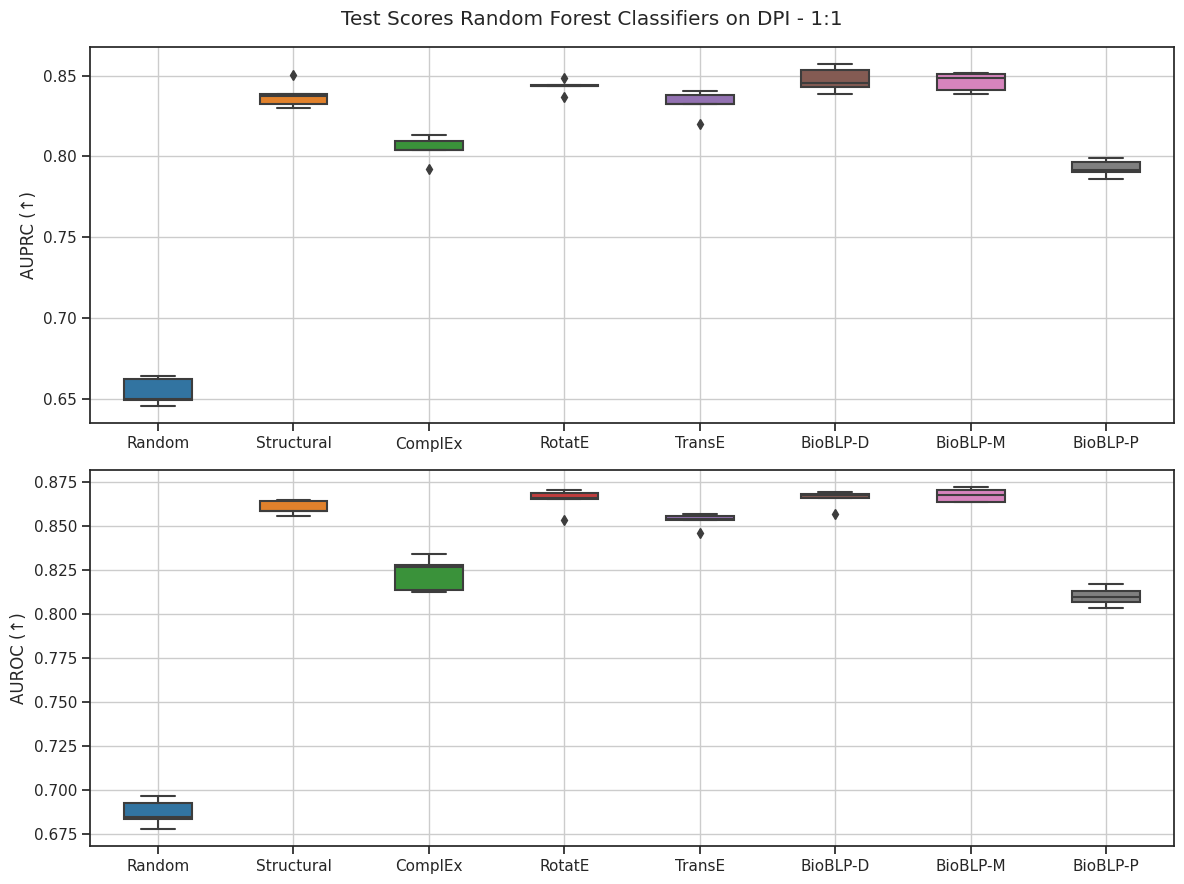

In [34]:
r1_results_df_rf = r1_results_df[r1_results_df["model_clf"].isin(["RF"])]

plot_aucpr_aucroc(r1_results_df_rf, savefile=reports_path.joinpath("20230426-dpi-r1-rf-aucs-box.pdf"),
                 title="Test Scores Random Forest Classifiers on DPI - 1:1")


In [136]:
r1_results_grouped_df = pd.read_csv(dpi_r1_results_grouped, sep=",")

r1_results_grouped_df = format_results_df(r1_results_grouped_df)

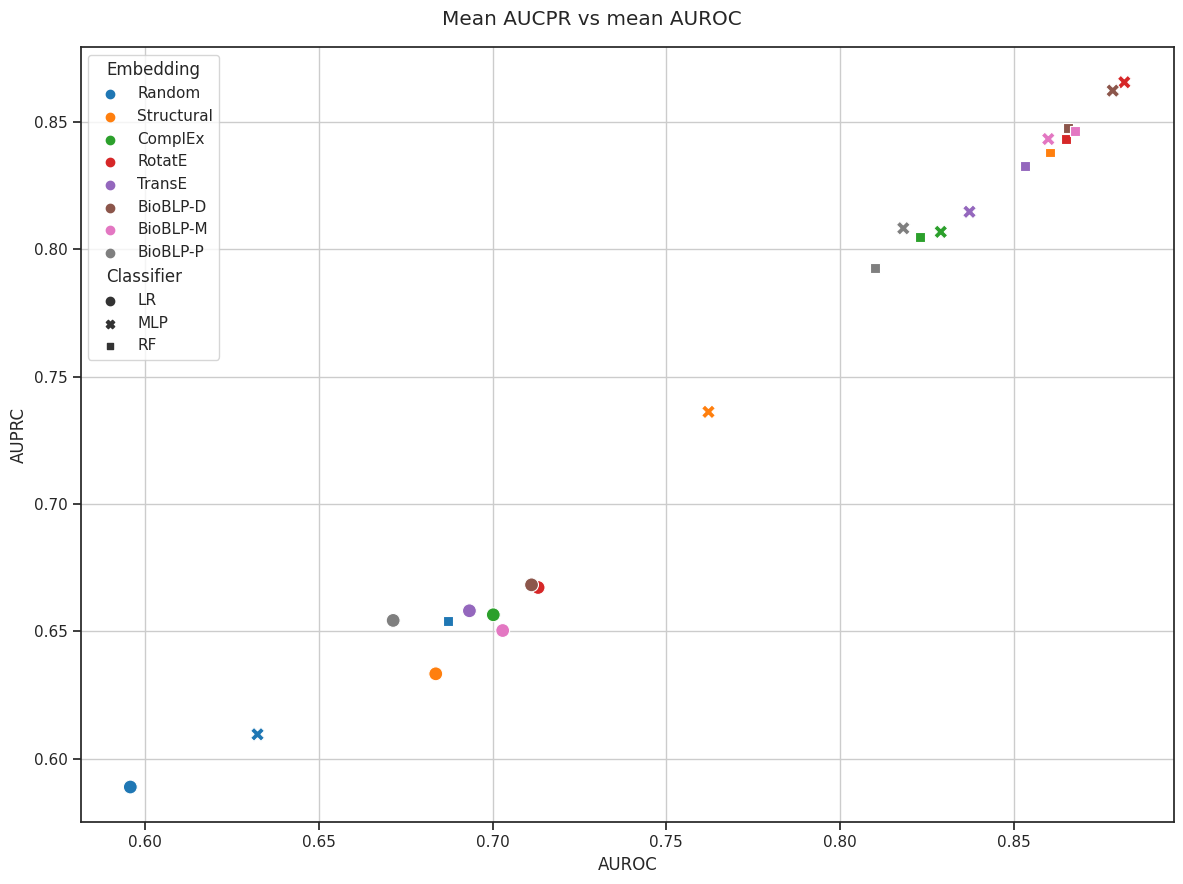

In [137]:
scatter_aucpr_auroc(r1_results_grouped_df, title="Mean AUCPR vs mean AUROC", savefile=reports_path.joinpath("20230426-dpi-r1-aucs-scatter-all.pdf"),)

## table

In [125]:
results_table(r1_results_df)

Index(['AUPRC_mean', 'AUPRC_std', 'AUROC_mean', 'AUROC_std', 'F1_mean',
       'F1_std'],
      dtype='object')


AUPRC              AUROC  \
model_feature model_clf                                         
Random        LR         0.589 ( ± 0.010 )  0.596 ( ± 0.012 )   
              MLP        0.610 ( ± 0.010 )  0.632 ( ± 0.011 )   
              RF         0.654 ( ± 0.008 )  0.687 ( ± 0.007 )   
Structural    LR         0.633 ( ± 0.006 )  0.684 ( ± 0.005 )   
              MLP        0.736 ( ± 0.008 )  0.762 ( ± 0.005 )   
              RF         0.838 ( ± 0.008 )  0.860 ( ± 0.004 )   
ComplEx       LR         0.657 ( ± 0.007 )  0.700 ( ± 0.006 )   
              MLP        0.807 ( ± 0.011 )  0.829 ( ± 0.008 )   
              RF         0.805 ( ± 0.008 )  0.823 ( ± 0.010 )   
RotatE        LR         0.667 ( ± 0.008 )  0.713 ( ± 0.004 )   
              MLP        0.866 ( ± 0.006 )  0.882 ( ± 0.006 )   
              RF         0.843 ( ± 0.004 )  0.865 ( ± 0.007 )   
TransE        LR         0.658 ( ± 0.007 )  0.693 ( ± 0.020 )   
              MLP        0.815 ( ± 0.007 )  0.837 ( ± 0.007 )   
              RF         0.833 ( ± 0.008 )  0.853 ( ± 0.004 )   
BioBLP-D      LR         0.668 ( ± 0.005 )  0.711 ( ± 0.006 )   
              MLP        0.862 ( ± 0.007 )  0.878 ( ± 0.005 )   
              RF         0.848 ( ± 0.008 )  0.866 ( ± 0.005 )   
BioBLP-M      LR         0.650 ( ± 0.005 )  0.703 ( ± 0.006 )   
              MLP        0.843 ( ± 0.007 )  0.860 ( ± 0.005 )   
              RF         0.846 ( ± 0.006 )  0.868 ( ± 0.004 )   
BioBLP-P      LR         0.654 ( ± 0.010 )  0.671 ( ± 0.008 )   
              MLP        0.808 ( ± 0.007 )  0.818 ( ± 0.006 )   
              RF         0.793 ( ± 0.005 )  0.810 ( ± 0.005 )   

                                        F1  
model_feature model_clf                     
Random        LR         0.570 ( ± 0.010 )  
              MLP        0.599 ( ± 0.012 )  
              RF         0.642 ( ± 0.007 )  
Structural    LR         0.643 ( ± 0.005 )  
              MLP        0.698 ( ± 0.006 )  
              RF         0.792 ( ± 0.003 )  
ComplEx       LR         0.657 ( ± 0.006 )  
              MLP        0.762 ( ± 0.007 )  
              RF         0.748 ( ± 0.011 )  
RotatE        LR         0.661 ( ± 0.005 )  
              MLP        0.807 ( ± 0.006 )  
              RF         0.786 ( ± 0.008 )  
TransE        LR         0.652 ( ± 0.012 )  
              MLP        0.765 ( ± 0.007 )  
              RF         0.778 ( ± 0.005 )  
BioBLP-D      LR         0.656 ( ± 0.003 )  
              MLP        0.804 ( ± 0.006 )  
              RF         0.788 ( ± 0.008 )  
BioBLP-M      LR         0.659 ( ± 0.006 )  
              MLP        0.784 ( ± 0.005 )  
              RF         0.792 ( ± 0.003 )  
BioBLP-P      LR         0.632 ( ± 0.008 )  
              MLP        0.747 ( ± 0.006 )  
              RF         0.738 ( ± 0.007 )

In [127]:
print(results_table(r1_results_df).to_latex(index=True, ))

Index(['AUPRC_mean', 'AUPRC_std', 'AUROC_mean', 'AUROC_std', 'F1_mean',
       'F1_std'],
      dtype='object')
\begin{tabular}{lllll}
\toprule
         &    &              AUPRC &              AUROC &                 F1 \\
model\_feature & model\_clf &                    &                    &                    \\
\midrule
Random & LR &  0.589 ( ± 0.010 ) &  0.596 ( ± 0.012 ) &  0.570 ( ± 0.010 ) \\
         & MLP &  0.610 ( ± 0.010 ) &  0.632 ( ± 0.011 ) &  0.599 ( ± 0.012 ) \\
         & RF &  0.654 ( ± 0.008 ) &  0.687 ( ± 0.007 ) &  0.642 ( ± 0.007 ) \\
Structural & LR &  0.633 ( ± 0.006 ) &  0.684 ( ± 0.005 ) &  0.643 ( ± 0.005 ) \\
         & MLP &  0.736 ( ± 0.008 ) &  0.762 ( ± 0.005 ) &  0.698 ( ± 0.006 ) \\
         & RF &  0.838 ( ± 0.008 ) &  0.860 ( ± 0.004 ) &  0.792 ( ± 0.003 ) \\
ComplEx & LR &  0.657 ( ± 0.007 ) &  0.700 ( ± 0.006 ) &  0.657 ( ± 0.006 ) \\
         & MLP &  0.807 ( ± 0.011 ) &  0.829 ( ± 0.008 ) &  0.762 ( ± 0.007 ) \\
         & RF &  0.805 ( ± 0.00

/tmp/ipykernel_318/1870224391.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_table(r1_results_df).to_latex(index=True, ))
